# Analyzing Worldwide and Regional and CPI Score Changes from 2012 to 2021 

## Data preparation and cleaning

In [1]:
import pandas as pd
pd.options.display.max_columns = None

# import CPI data from 2012-2021
CPI_2021 = pd.read_csv("datasets/CPI/CPI2021-Table 1.csv", header=2)
CPI_2020 = pd.read_csv("datasets/CPI/CPI2020-Table 1.csv", header=2)
CPI_2019 = pd.read_csv("datasets/CPI/CPI2019-Table 1.csv", header=2)
CPI_2018 = pd.read_csv("datasets/CPI/CPI2018-Table 1.csv", header=2)
CPI_2017 = pd.read_csv("datasets/CPI/CPI2017-Table 1.csv", header=2)
CPI_2016 = pd.read_csv("datasets/CPI/CPI2016-Table 1.csv")
CPI_2015 = pd.read_csv("datasets/CPI/CPI2015-Table 1.csv")
CPI_2014 = pd.read_csv("datasets/CPI/CPI2014-Table 1.csv")
CPI_2013 = pd.read_csv("datasets/CPI/CPI2013-Table 1.csv", header=1)
CPI_2012 = pd.read_csv("datasets/CPI/CPI2012-Table 1.csv")

# retrieve the Country, ISO3, Region, CPI score, and rank columns from all datasets
# 2021
CPI_2021 = CPI_2021.iloc[:, :5]
CPI_2021.rename(columns={ "Country / Territory": "Country", "Rank": "Rank 2021"}, 
                inplace=True)

# 2020
CPI_2020 = CPI_2020.iloc[:, :5]
CPI_2020.rename(columns={ "Rank": "Rank 2020"}, inplace=True)
CPI = CPI_2021.merge(CPI_2020, how="outer", on=["Country", "ISO3", "Region"])

# 2019
CPI_2019 = CPI_2019.iloc[:, :5]
CPI_2019.rename(columns={ "Rank": "Rank 2019"}, inplace=True)
CPI = CPI.merge(CPI_2019, how="outer", on=["Country", "ISO3", "Region"])

# 2018
CPI_2018 = CPI_2018.iloc[:, :5]
CPI_2018.rename(columns={ "Rank ": "Rank 2018", "CPI Score 2018": "CPI score 2018"}, 
                inplace=True)
CPI = CPI.merge(CPI_2018, how="outer", on=["Country", "ISO3", "Region"])


# 2017
CPI_2017 = CPI_2017.iloc[:, :5]
CPI_2017.rename(columns={ "Rank ": "Rank 2017", "CPI Score 2017": "CPI score 2017"}, 
                inplace=True)
CPI = CPI.merge(CPI_2017, how="outer", on=["Country", "ISO3", "Region"])

# 2016 - from this point on, the datasets have slightly different columns and values than the above datasets
CPI_2016 = CPI_2016.iloc[:, :4]
CPI_2016.rename(columns={ "CPI2016": "CPI score 2016", "Rank": "Rank 2016"}, inplace=True)
CPI = CPI.merge(CPI_2016, how="outer", on=["Country"], suffixes=["", "_2016"])
CPI.drop("Region_2016", axis=1, inplace=True)

# 2015
CPI_2015 = CPI_2015.iloc[:, :5]
CPI_2015.drop("Region", axis=1, inplace=True)
CPI_2015.rename(columns={ "CPI 2015 Score": "CPI score 2015", 
                         "Country Rank": "Rank 2015", 
                         "Country/Territory": "Country", 
                         "Country Code": "ISO3"
                        }, 
                        inplace=True)
CPI = CPI.merge(CPI_2015, how="outer", on=["Country"], suffixes=["", "_2015"])

# 2014
CPI_2014 = CPI_2014.iloc[:, :5]
CPI_2014.drop("Region", axis=1, inplace=True)
CPI_2014.rename(columns={ "CPI 2014": "CPI score 2014", 
                         "Country Rank": "Rank 2014", 
                         "Country/Territory": "Country", 
                         "Country Code": "ISO3"
                        }, 
                        inplace=True)
CPI = CPI.merge(CPI_2014, how="outer", on=["Country"], suffixes=["", "_2014"])

# 2013
CPI_2013 = CPI_2013.iloc[:, :7]
CPI_2013.drop(labels=["Region", "IFS Code", "Country Rank.1"], axis=1, inplace=True)
CPI_2013.rename(columns={ "CPI 2013 Score": "CPI score 2013", 
                         "Country Rank": "Rank 2013", 
                         "Country / Territory": "Country", 
                         "Country Code": "ISO3", 
                         "WB Code": "ISO3"}, 
                         inplace=True)
CPI = CPI.merge(CPI_2013, how="outer", on=["Country"], suffixes=["", "_2013"])

# 2012
CPI_2012 = CPI_2012.iloc[:, :4]
CPI_2012.drop(labels=["Unnamed: 2"], axis=1, inplace=True)
CPI_2012.rename(columns={ "CPI 2012 Score": "CPI score 2012", 
                         "Country Rank": "Rank 2012", 
                         "Country / Territory": "Country"}, 
                         inplace=True)
CPI = CPI.merge(CPI_2012, how="outer", on=["Country"], suffixes=["", "_2012"])


# sanity check
print(CPI.shape)
CPI.head()

(203, 26)


,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,ISO3_2015,CPI score 2015,Rank 2014,ISO3_2014,CPI score 2014,Rank 2013,ISO3_2013,CPI score 2013,Rank 2012,CPI score 2012
0,Denmark,DNK,WE/EU,88.0,1.0,88.0,1.0,87.0,1.0,88.0,1.0,88.0,2.0,90.0,1.0,1.0,DNK,91.0,1.0,DNK,92.0,1.0,DNK,91.0,1.0,90.0
1,Finland,FIN,WE/EU,88.0,1.0,85.0,3.0,86.0,3.0,85.0,3.0,85.0,3.0,89.0,3.0,3.0,FIN,90.0,3.0,FIN,89.0,3.0,FIN,89.0,1.0,90.0
2,New Zealand,NZL,AP,88.0,1.0,88.0,1.0,87.0,1.0,87.0,2.0,89.0,1.0,90.0,1.0,1.0,NZL,91.0,2.0,NZL,91.0,1.0,NZL,91.0,1.0,90.0
3,Norway,NOR,WE/EU,85.0,4.0,84.0,7.0,84.0,7.0,84.0,7.0,85.0,3.0,85.0,6.0,5.0,NOR,88.0,5.0,NOR,86.0,5.0,NOR,86.0,7.0,85.0
4,Singapore,SGP,AP,85.0,4.0,85.0,3.0,85.0,4.0,85.0,3.0,84.0,6.0,84.0,7.0,7.0,SGP,85.0,7.0,SGP,84.0,5.0,SGP,86.0,5.0,87.0


### Remove null values and duplicate rows

In [2]:
# there are some null values in the final dataframe
# let's see if we can clean them up

# Country's frequency table
# No NaN
CPI["Country"].value_counts(dropna=False)

Denmark               1
Mauritania            1
Djibouti              1
Dominican Republic    1
Laos                  1
                     ..
South Africa          1
Tunisia               1
Ghana                 1
Hungary               1
Puerto Rico           1
Name: Country, Length: 203, dtype: int64

In [3]:
# Country's columns
CPI.columns

Index(['Country', 'ISO3', 'Region', 'CPI score 2021', 'Rank 2021',
       'CPI score 2020', 'Rank 2020', 'CPI score 2019', 'Rank 2019',
       'CPI score 2018', 'Rank 2018', 'CPI score 2017', 'Rank 2017',
       'CPI score 2016', 'Rank 2016', 'Rank 2015', 'ISO3_2015',
       'CPI score 2015', 'Rank 2014', 'ISO3_2014', 'CPI score 2014',
       'Rank 2013', 'ISO3_2013', 'CPI score 2013', 'Rank 2012',
       'CPI score 2012'],
      dtype='object')

In [4]:
# We discovered some duplicate ISO3 columns
#
# The ISO3 code for certain countries has changed some time in between 2012 to 2021
# e.g. Montenegro's ISO3 was once MON but it changed to MNE after the CPI 2015 data was published
# Trivia: actually, the ISO3 change for Montenegro happened in 2007, but the CPI dataset still used the old ISO3 code
#
# We'll keep the newest ISO3 and drop the rest
CPI = CPI.drop(["ISO3_2015", "ISO3_2014", "ISO3_2013"], axis=1)
CPI.columns

Index(['Country', 'ISO3', 'Region', 'CPI score 2021', 'Rank 2021',
       'CPI score 2020', 'Rank 2020', 'CPI score 2019', 'Rank 2019',
       'CPI score 2018', 'Rank 2018', 'CPI score 2017', 'Rank 2017',
       'CPI score 2016', 'Rank 2016', 'Rank 2015', 'CPI score 2015',
       'Rank 2014', 'CPI score 2014', 'Rank 2013', 'CPI score 2013',
       'Rank 2012', 'CPI score 2012'],
      dtype='object')

In [5]:
# There's a null value we haven't checked
# The curious thing is the value_counts doesn't show the NaN value
CPI["Country"].value_counts(dropna=False)

# we'll directly retrieve it with isnull
CPI[CPI["Country"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Row with index 186 has NaN for all its columns. 
# It probably came from an empty row in one of the original datasets. We can safely drop it.
CPI.drop(186, axis=0, inplace=True)

# 202 countries left
CPI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 202
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         202 non-null    object 
 1   ISO3            186 non-null    object 
 2   Region          186 non-null    object 
 3   CPI score 2021  180 non-null    float64
 4   Rank 2021       180 non-null    float64
 5   CPI score 2020  180 non-null    float64
 6   Rank 2020       180 non-null    float64
 7   CPI score 2019  180 non-null    float64
 8   Rank 2019       180 non-null    float64
 9   CPI score 2018  180 non-null    float64
 10  Rank 2018       180 non-null    float64
 11  CPI score 2017  181 non-null    float64
 12  Rank 2017       180 non-null    float64
 13  CPI score 2016  176 non-null    float64
 14  Rank 2016       176 non-null    float64
 15  Rank 2015       168 non-null    float64
 16  CPI score 2015  168 non-null    float64
 17  Rank 2014       175 non-null    flo

In [7]:
# We also discovered a country named GLOBAL AVARAGE below the previous row with index 186.
# There's barely any data in the GLOBAL AVARAGE and we don't need any of them. We decided to drop it.
CPI.drop(187, axis=0, inplace=True)

# Dropping the columns didn't reset index; let's do that
CPI.reset_index(drop=True, inplace=True)

In [8]:
# There are some other peculiarities with the Country columns.
# The USA has multiple rows representing it because their country names differ:
# 1. United States of America
# 2. The United States of America
# 3. United States

CPI[CPI["Country"].str.match(r"(The )?United States")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
27,United States of America,USA,AME,67.0,27.0,67.0,25.0,69.0,23.0,71.0,22.0,75.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,The United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,76.0,17.0,74.0,19.0,73.0,19.0,73.0


In [9]:
# We'll stick with the row that has the most recent data ,i.e. row 27 with the name United States of America, 
# and fill the missing values using data from the older rows.
#
# This is a recurring issue, so it pays to create a function for it.

# Replace values of row with keep_indexes based on copy_dicts.
# Finish by dropping the copied rows and reset index.
def clean_inconsistent_names(df, keep_indexes, copy_dicts):
    # iterate over both keep_indexes and copy_dicts
    # the iterator variable for keep_indexes will be an index number
    # the iterator variable for copy_dicts will be a dictionary containing an index number mapped to the column names to copy from
    for keep_index, copy_dict in zip(keep_indexes, copy_dicts):
        for copy_index, cols in copy_dict.items():
            # this is where the copying happens 
            # i.e. a row with index of keep_index has its values replaced by values from a row with index of copy_index
            CPI.loc[keep_index, cols] = CPI.loc[copy_index, cols]
    
    drop_rows = []
    for dict in copy_dicts:
            # get the row index to drop
            drop_rows += dict.keys()
            
    drop_rows = list(drop_rows)
    CPI.drop(drop_rows, axis=0, inplace=True)
    CPI.reset_index(drop=True, inplace=True)

copy_usa_dicts = {186: ["CPI score 2016", "Rank 2016"], 
                  197: ["CPI score 2015", "Rank 2015", 
                        "CPI score 2014", "Rank 2014", 
                        "CPI score 2013", "Rank 2013", 
                        "CPI score 2012", "Rank 2012"]}
clean_inconsistent_names(CPI, [27], [copy_usa_dicts])

# we'll also drop the two rows and reset the index afterwards
CPI[CPI["Country"].str.match(r"(The )?United States")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
27,United States of America,USA,AME,67.0,27.0,67.0,25.0,69.0,23.0,71.0,22.0,75.0,16.0,74.0,18.0,16.0,76.0,17.0,74.0,19.0,73.0,19.0,73.0


In [10]:
# Country has no null and duplicate values as of now
CPI.info()
CPI[CPI.duplicated(subset="Country")]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         199 non-null    object 
 1   ISO3            186 non-null    object 
 2   Region          186 non-null    object 
 3   CPI score 2021  180 non-null    float64
 4   Rank 2021       180 non-null    float64
 5   CPI score 2020  180 non-null    float64
 6   Rank 2020       180 non-null    float64
 7   CPI score 2019  180 non-null    float64
 8   Rank 2019       180 non-null    float64
 9   CPI score 2018  180 non-null    float64
 10  Rank 2018       180 non-null    float64
 11  CPI score 2017  180 non-null    float64
 12  Rank 2017       180 non-null    float64
 13  CPI score 2016  176 non-null    float64
 14  Rank 2016       176 non-null    float64
 15  Rank 2015       168 non-null    float64
 16  CPI score 2015  168 non-null    float64
 17  Rank 2014       175 non-null    flo

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012


In [11]:
# ISO3 has a some null values as well
# We'll also be looking for duplicates at the same time
CPI[CPI["ISO3"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
186,Saint Vincent and The Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,38.0,40.0,55.0,43.0,57.0,41.0,58.0,39.0,60.0
188,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,41.0,NaN,NaN,NaN,NaN,38.0,60.0,46.0,55.0
189,Korea (South),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,52.0,43.0,54.0,44.0,55.0,46.0,55.0,45.0,56.0
190,The FYR of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,90.0,66.0,42.0,64.0,45.0,NaN,NaN,NaN,NaN
191,Côte d’Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,The Democratic Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,Guinea-Bissau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,168.0,158.0,17.0,161.0,19.0,163.0,19.0,150.0,25.0
195,Korea (North),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,174.0,167.0,8.0,174.0,8.0,175.0,8.0,174.0,8.0


In [12]:
# While reviewing the ISO3 duplicates, we discovered Country duplicates we didn't manage to capture before this
# e.g. Côte d’Ivoire is slightly different than Côte d´Ivoire because it has a Greek oxia character in place of apostrophe
#
# Other than that, there is another country with the same naming issue as the United States — Republic of Congo
#
# South and North Korea possibly have inconsistent names as well
#
# We'll start by examining both the Korea countries
CPI[CPI["Country"].str.contains("Korea")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
31,"Korea, South",KOR,AP,62.0,32.0,61.0,33.0,59.0,39.0,57.0,45.0,54.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,"Korea, North",PRK,AP,16.0,174.0,18.0,170.0,17.0,172.0,14.0,176.0,17.0,171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,Korea (South),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,52.0,43.0,54.0,44.0,55.0,46.0,55.0,45.0,56.0
195,Korea (North),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,174.0,167.0,8.0,174.0,8.0,175.0,8.0,174.0,8.0


In [13]:
# Copy data to most recent Korea countries rows
skorea_clean_dict = {189:  ["CPI score 2016", "Rank 2016", "CPI score 2015", "Rank 2015", 
             "CPI score 2014", "Rank 2014", 
             "CPI score 2013", "Rank 2013", 
             "CPI score 2012", "Rank 2012"]}

nkorea_clean_dict = {195:  ["CPI score 2016", "Rank 2016", "CPI score 2015", "Rank 2015", 
             "CPI score 2014", "Rank 2014", 
             "CPI score 2013", "Rank 2013", 
             "CPI score 2012", "Rank 2012"]}

# Clean both Korean countries
clean_inconsistent_names(CPI, [31, 174], [skorea_clean_dict, nkorea_clean_dict])

CPI[CPI["Country"].str.contains("Korea")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
31,"Korea, South",KOR,AP,62.0,32.0,61.0,33.0,59.0,39.0,57.0,45.0,54.0,51.0,53.0,52.0,43.0,54.0,44.0,55.0,46.0,55.0,45.0,56.0
174,"Korea, North",PRK,AP,16.0,174.0,18.0,170.0,17.0,172.0,14.0,176.0,17.0,171.0,12.0,174.0,167.0,8.0,174.0,8.0,175.0,8.0,174.0,8.0


In [14]:
# we'll target Côte d’Ivoire next
CPI[CPI["Country"].str.contains("Ivoire")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
104,Cote d'Ivoire,CIV,SSA,36.0,105.0,NaN,NaN,35.0,106.0,35.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Côte d'Ivoire,CIV,SSA,NaN,NaN,36.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,Côte D'Ivoire,CIV,SSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,Côte d’Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,Côte d´Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,32.0,115.0,32.0,136.0,27.0,130.0,29.0


In [15]:
# For unknown reasons, the clean_inconsistent_names function doesn't work well for Côte d’Ivoire
# So, we'll resort to copying the data without it

CPI.loc[181, ["CPI score 2017", "Rank 2017"]] = CPI.loc[185, ["CPI score 2017", "Rank 2017"]]

CPI.loc[181, ["CPI score 2016", "Rank 2016"]] = CPI.loc[190, ["CPI score 2016", "Rank 2016"]]

CPI.loc[181, ["CPI score 2015", "Rank 2015", 
              "CPI score 2014", "Rank 2014", 
              "CPI score 2013", "Rank 2013", 
              "CPI score 2012", "Rank 2012"]] = CPI.loc[194, ["CPI score 2015", "Rank 2015", 
                                                              "CPI score 2014", "Rank 2014", 
                                                              "CPI score 2013", "Rank 2013", 
                                                              "CPI score 2012", "Rank 2012"]]

CPI.drop([185,190,194], inplace=True)

CPI[CPI["Country"].str.contains("Côte")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
181,Côte d'Ivoire,CIV,SSA,NaN,NaN,36.0,104.0,NaN,NaN,NaN,NaN,36.0,103.0,34.0,108.0,106.0,32.0,115.0,32.0,136.0,27.0,130.0,29.0


In [16]:
# Next, Congo
CPI[CPI["Country"].str.match(r".*Congo")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
161,Congo,COG,SSA,21.0,162.0,19.0,165.0,19.0,165.0,19.0,165.0,21.0,161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,Democratic Republic of the Congo,COD,SSA,19.0,169.0,18.0,170.0,18.0,168.0,20.0,161.0,21.0,161.0,NaN,NaN,147.0,22.0,154.0,22.0,154.0,22.0,160.0,21.0
191,The Democratic Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,Congo Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,23.0,152.0,23.0,154.0,22.0,144.0,26.0


In [17]:
# There are two countries that has "Congo" in their names
# On top of that, both of them also contain "Republic"
# The only thing that differentiates them is the word "Democratic"
#
# But, the recent CPI datasets (2021-2017) simply calls the Republic of the Congo as Congo, while the Democratic Republic of Congo retains the full name
# This is probably because they are using the country's ISO short name
#
# References: 
# Republic of the Congo - https://www.iso.org/obp/ui/#iso:code:3166:CG
# Democratic Republic of the Congo - https://www.iso.org/obp/ui/#iso:code:3166:CD
#
# To make the distinction clearer, we'll use their full name instead

# Rename most recent Republic of the Congo row to its full name
CPI.loc[161, ["Country"]] = "Republic of the Congo"
CPI[CPI["Country"].str.match(r".*Congo")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
161,Republic of the Congo,COG,SSA,21.0,162.0,19.0,165.0,19.0,165.0,19.0,165.0,21.0,161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,Democratic Republic of the Congo,COD,SSA,19.0,169.0,18.0,170.0,18.0,168.0,20.0,161.0,21.0,161.0,NaN,NaN,147.0,22.0,154.0,22.0,154.0,22.0,160.0,21.0
191,The Democratic Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,Congo Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,23.0,152.0,23.0,154.0,22.0,144.0,26.0


In [18]:
# Index 195 country name — Congo Republic — is ambiguous, 
# and because we don't have its ISO3 due to datasets merging, we should check its value in the original dataset
CPI_2015[CPI_2015["Country"].str.match(r".*Congo")]

,Rank 2015,Country,ISO3,CPI score 2015
145,146,Congo Republic,COG,23
147,147,Democratic Republic of the Congo,COD,22


In [19]:
# We are now certain that index 195 refers to Republic of the Congo (the earlier datasets follow the same pattern)
CPI_2014[CPI_2014["Country"].str.match(r".*Congo")]

,Rank 2014,Country,ISO3,CPI score 2014
151,152,Congo Republic,COG,23
154,154,Democratic Republic of the Congo,COD,22


In [20]:
# We'll clean Republic of the Congo first:
# index 161 - keep
# index 195 - copy 2013-2015 scores and ranks
# index 192 - copy 2016 score and rank

clean_rotc_dicts = {
                    195: ["CPI score 2015", "Rank 2015", 
                          "CPI score 2014", "Rank 2014", 
                          "CPI score 2013", "Rank 2013",
                          "CPI score 2012", "Rank 2012"],
                    192: ["CPI score 2016", "Rank 2016"]
                   }

clean_inconsistent_names(CPI, [161], [clean_rotc_dicts])
CPI[CPI["Country"].str.match(r".*Congo")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
161,Republic of the Congo,COG,SSA,21.0,162.0,19.0,165.0,19.0,165.0,19.0,165.0,21.0,161.0,20.0,159.0,146.0,23.0,152.0,23.0,154.0,22.0,144.0,26.0
169,Democratic Republic of the Congo,COD,SSA,19.0,169.0,18.0,170.0,18.0,168.0,20.0,161.0,21.0,161.0,NaN,NaN,147.0,22.0,154.0,22.0,154.0,22.0,160.0,21.0
189,The Democratic Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Now, Democratic Republic of the Congo
# index 169 - keep
# index 189 - copy 2016 score and rank
clean_drotc_dict = {
                    189: ["CPI score 2016", "Rank 2016"]
                   }

clean_inconsistent_names(CPI, [169], [clean_drotc_dict])
CPI[CPI["Country"].str.match(r".*Congo")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
161,Republic of the Congo,COG,SSA,21.0,162.0,19.0,165.0,19.0,165.0,19.0,165.0,21.0,161.0,20.0,159.0,146.0,23.0,152.0,23.0,154.0,22.0,144.0,26.0
169,Democratic Republic of the Congo,COD,SSA,19.0,169.0,18.0,170.0,18.0,168.0,20.0,161.0,21.0,161.0,21.0,156.0,147.0,22.0,154.0,22.0,154.0,22.0,160.0,21.0


In [22]:
# There doesn't seem to be any duplicate countries based on the following query
# Still, it's worthwhile reviewing each of the country to avoid missed duplicates
CPI[CPI["ISO3"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
185,Saint Vincent and The Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,38.0,40.0,55.0,43.0,57.0,41.0,58.0,39.0,60.0
187,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,41.0,NaN,NaN,NaN,NaN,38.0,60.0,46.0,55.0
188,The FYR of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,90.0,66.0,42.0,64.0,45.0,NaN,NaN,NaN,NaN
189,Guinea-Bissau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,168.0,158.0,17.0,161.0,19.0,163.0,19.0,150.0,25.0
190,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [23]:
# Checking the six ISO3 null countries if they are duplicates
# 1. Saint Vincent and The Grenadines
#
# Duplicate exist because of "the" and "The" mismatch
CPI[CPI["Country"].str.match(r".*Vincent")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
37,Saint Vincent and the Grenadines,VCT,AME,59.0,36.0,59.0,40.0,59.0,39.0,58.0,41.0,58.0,40.0,NaN,NaN,NaN,NaN,35.0,62.0,33.0,62.0,36.0,62.0
185,Saint Vincent and The Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Clean Saint Vincent and the Grenadines
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[37],[{185: ["CPI score 2016", "Rank 2016"]}])
CPI[CPI["Country"].str.match(r".*Vincent")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
37,Saint Vincent and the Grenadines,VCT,AME,59.0,36.0,59.0,40.0,59.0,39.0,58.0,41.0,58.0,40.0,60.0,35.0,NaN,NaN,35.0,62.0,33.0,62.0,36.0,62.0


In [25]:
# 2. Cape Verde
CPI[CPI["Country"].str.match(r".*Verde")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
38,Cabo Verde,CPV,SSA,58.0,39.0,58.0,41.0,58.0,41.0,57.0,45.0,55.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,38.0,40.0,55.0,43.0,57.0,41.0,58.0,39.0,60.0


In [26]:
# Clean Cape Verde
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[38],[{185: ["CPI score 2016", "Rank 2016",
                                          "CPI score 2015", "Rank 2015",
                                          "CPI score 2014", "Rank 2014",
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012",]
                                   }
                                  ])
CPI[CPI["Country"].str.match(r".*Verde")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
38,Cabo Verde,CPV,SSA,58.0,39.0,58.0,41.0,58.0,41.0,57.0,45.0,55.0,48.0,59.0,38.0,40.0,55.0,43.0,57.0,41.0,58.0,39.0,60.0


In [27]:
# 3. Brunei
# The name is longer for the row with the most recent data
CPI[CPI["Country"].str.match(r".*Brunei")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
180,Brunei Darussalam,BRN,AP,NaN,NaN,60.0,35.0,60.0,35.0,63.0,31.0,62.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,41.0,NaN,NaN,NaN,NaN,38.0,60.0,46.0,55.0


In [28]:
# Clean Brunei
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[180],[{185: ["CPI score 2016", "Rank 2016", 
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012",]
                                   }
                                  ])
CPI[CPI["Country"].str.match(r".*Brunei")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
180,Brunei Darussalam,BRN,AP,NaN,NaN,60.0,35.0,60.0,35.0,63.0,31.0,62.0,32.0,58.0,41.0,NaN,NaN,NaN,NaN,38.0,60.0,46.0,55.0


In [29]:
# 4. Macedonia
# Multiple names
CPI[CPI["Country"].str.match(r".*Macedonia")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
91,North Macedonia,MKD,ECA,39.0,87.0,35.0,111.0,35.0,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,Macedonia,MKD,ECA,NaN,NaN,NaN,NaN,NaN,NaN,37.0,93.0,35.0,107.0,NaN,NaN,NaN,NaN,NaN,NaN,67.0,44.0,69.0,43.0
185,The FYR of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,90.0,66.0,42.0,64.0,45.0,NaN,NaN,NaN,NaN


In [30]:
# Clean Macedonia
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[91],[{184: ["CPI score 2018", "Rank 2018", 
                                          "CPI score 2017", "Rank 2017",
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012"
                                         ],
                                   
                                   185: [ "CPI score 2016", "Rank 2016",
                                           "CPI score 2015", "Rank 2015",
                                           "CPI score 2014", "Rank 2014"
                                         ]
                                       
                                   }
                                  ])
CPI[CPI["Country"].str.match(r".*Macedonia")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
91,North Macedonia,MKD,ECA,39.0,87.0,35.0,111.0,35.0,106.0,37.0,93.0,35.0,107.0,37.0,90.0,66.0,42.0,64.0,45.0,67.0,44.0,69.0,43.0


In [31]:
# 5 Guinea-Bissau
# No '-' for the most recent data
CPI[CPI["Country"].str.match(r".*(Bissau)")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
162,Guinea Bissau,GNB,SSA,21.0,162.0,19.0,165.0,18.0,168.0,16.0,172.0,17.0,171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,Guinea-Bissau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,168.0,158.0,17.0,161.0,19.0,163.0,19.0,150.0,25.0


In [32]:
# Clean Bissau
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[162],[{184: ["CPI score 2016", "Rank 2016", 
                                          "CPI score 2015", "Rank 2015",
                                          "CPI score 2014", "Rank 2014",
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012"
                                         ]
                                   }
                                  ])
CPI[CPI["Country"].str.match(r".*Bissau")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
162,Guinea Bissau,GNB,SSA,21.0,162.0,19.0,165.0,18.0,168.0,16.0,172.0,17.0,171.0,16.0,168.0,158.0,17.0,161.0,19.0,163.0,19.0,150.0,25.0


In [33]:
# 6 Puerto Rico
# Possibly the only country which missing ISO3 and has no duplicates
CPI[CPI["Country"].str.match(r".*(Puerto|Rico)")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
184,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [34]:
# Puerto Rico's ISO3 is PRI — https://www.iso.org/obp/ui/#iso:code:3166:PR
CPI.loc[184, ["ISO3"]] = "PRI"
CPI[CPI["Country"].str.match(r".*(Puerto|Rico)")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
184,Puerto Rico,PRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [35]:
# Confirm no nulls for ISO3
CPI[CPI["ISO3"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012


In [36]:
# Confirm if all duplicates are dealt with
CPI[CPI["ISO3"].duplicated()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
181,Côte d'Ivoire,CIV,SSA,NaN,NaN,36.0,104.0,NaN,NaN,NaN,NaN,36.0,103.0,34.0,108.0,106.0,32.0,115.0,32.0,136.0,27.0,130.0,29.0
182,Czech Republic,CZE,WE/EU,NaN,NaN,NaN,NaN,56.0,44.0,59.0,38.0,57.0,42.0,55.0,47.0,38.0,56.0,53.0,51.0,57.0,48.0,54.0,49.0
183,Swaziland,SWZ,SSA,NaN,NaN,NaN,NaN,NaN,NaN,38.0,89.0,39.0,85.0,NaN,NaN,NaN,NaN,69.0,43.0,82.0,39.0,88.0,37.0


In [37]:
# We missed one duplicate because we didn't consider a case where Cote has no circumflex 'o'
CPI[CPI["ISO3"] == "CIV"]



,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
104,Cote d'Ivoire,CIV,SSA,36.0,105.0,NaN,NaN,35.0,106.0,35.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Côte d'Ivoire,CIV,SSA,NaN,NaN,36.0,104.0,NaN,NaN,NaN,NaN,36.0,103.0,34.0,108.0,106.0,32.0,115.0,32.0,136.0,27.0,130.0,29.0


In [38]:
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[104],[{181: ["CPI score 2020", "Rank 2020",
                                           "CPI score 2017", "Rank 2017",
                                           "CPI score 2016", "Rank 2016",
                                          "CPI score 2015", "Rank 2015",
                                          "CPI score 2014", "Rank 2014",
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012"
                                         ]
                                   }
                                  ])

CPI[CPI["ISO3"] == "CIV"]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
104,Cote d'Ivoire,CIV,SSA,36.0,105.0,36.0,104.0,35.0,106.0,35.0,105.0,36.0,103.0,34.0,108.0,106.0,32.0,115.0,32.0,136.0,27.0,130.0,29.0


In [39]:
CPI[CPI["ISO3"] == "CZE"]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
48,Czechia,CZE,WE/EU,54.0,49.0,54.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Czech Republic,CZE,WE/EU,NaN,NaN,NaN,NaN,56.0,44.0,59.0,38.0,57.0,42.0,55.0,47.0,38.0,56.0,53.0,51.0,57.0,48.0,54.0,49.0


In [40]:
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[48],[{181: [
                                          "CPI score 2019", "Rank 2019",
                                          "CPI score 2018", "Rank 2018",
                                          "CPI score 2017", "Rank 2017",
                                          "CPI score 2016", "Rank 2016", 
                                          "CPI score 2015", "Rank 2015",
                                          "CPI score 2014", "Rank 2014",
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012"
                                         ]
                                   }
                                  ])

CPI[CPI["ISO3"] == "CZE"]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
48,Czechia,CZE,WE/EU,54.0,49.0,54.0,49.0,56.0,44.0,59.0,38.0,57.0,42.0,55.0,47.0,38.0,56.0,53.0,51.0,57.0,48.0,54.0,49.0


In [41]:
CPI[CPI["ISO3"] == "SWZ"]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
121,Eswatini,SWZ,SSA,32.0,122.0,33.0,117.0,34.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Swaziland,SWZ,SSA,NaN,NaN,NaN,NaN,NaN,NaN,38.0,89.0,39.0,85.0,NaN,NaN,NaN,NaN,69.0,43.0,82.0,39.0,88.0,37.0


In [42]:
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[121],[{181: [
             
                                          "CPI score 2018", "Rank 2018",
                                          "CPI score 2017", "Rank 2017",
                                     
                                          "CPI score 2014", "Rank 2014",
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012"
                                         ]
                                   }
                                  ])

CPI[CPI["ISO3"] == "SWZ"]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
121,Eswatini,SWZ,SSA,32.0,122.0,33.0,117.0,34.0,113.0,38.0,89.0,39.0,85.0,NaN,NaN,NaN,NaN,69.0,43.0,82.0,39.0,88.0,37.0


## Region



In [43]:
# Get rows with missing Region
CPI[CPI["Region"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
181,Puerto Rico,PRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [44]:
# Looking at past datasets, Puerto Rico is in the AME (The Americas) region
CPI.loc[181, ["Region"]] = "AME"
CPI[CPI["ISO3"] == "PRI"]
# CPI["Country"].str.match(r".*(Puerto|Rico)")
# CPI[CPI["Country"].str.match(r".*(Puerto|Rico)]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
181,Puerto Rico,PRI,AME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [45]:
# Confirm no more null regions
CPI[CPI["Region"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012


### CPI scores and ranks

In [46]:
CPI.info()

# Transparency International is responsible for collecting the data.
# They started standardizing the number of countries included in the global ranking to 180 countries each year in 2017.
#
# The numbers of non-null scores and ranks for the year 2016 and earlier matched the number of countries in the corresponding dataset
# e.g. 2016 dataset ranked 176 countries which corresponds to the 176 non-null CPI scores in our merged dataset
#
# If a country has a null score or rank for a particular year, it's either they don't pass the requirement to get included in the index,
# or their ranks are lower than the ranking threshold 
# i.e. only those ranked 180 or better are included in the later datasets, while the limit is different but still close to 180 in earlier dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         182 non-null    object 
 1   ISO3            182 non-null    object 
 2   Region          182 non-null    object 
 3   CPI score 2021  180 non-null    float64
 4   Rank 2021       180 non-null    float64
 5   CPI score 2020  180 non-null    float64
 6   Rank 2020       180 non-null    float64
 7   CPI score 2019  180 non-null    float64
 8   Rank 2019       180 non-null    float64
 9   CPI score 2018  180 non-null    float64
 10  Rank 2018       180 non-null    float64
 11  CPI score 2017  180 non-null    float64
 12  Rank 2017       180 non-null    float64
 13  CPI score 2016  176 non-null    float64
 14  Rank 2016       176 non-null    float64
 15  Rank 2015       168 non-null    float64
 16  CPI score 2015  168 non-null    float64
 17  Rank 2014       175 non-null    flo

In [47]:
# As a precaution, we'll check whether the number of rows with non-null score and rank match the number of rows in the original dataset
# We only use the number of rows with non-null CPI score because if CPI score is null, rank will also be null

merged_rownums    = [year for year in range(2012, 2017)]
original_datasets = [CPI_2012, CPI_2013, CPI_2014, CPI_2015, CPI_2016]

print("Is the number of non-null scores and ranks in the merged dataset equal to the row numbers of the original datasets?")
for year, dataset in zip(merged_rownums, original_datasets):
    merged_length = CPI[~CPI["CPI score {}".format(year)].isnull()].shape[0]
    original_length = dataset.shape[0]
    
    print("{}: {}".format(year, merged_length == original_length))

Is the number of non-null scores and ranks in the merged dataset equal to the row numbers of the original datasets?
2012: True
2013: True
2014: True
2015: True
2016: True


# Analysis

## 

In [48]:
import matplotlib.pyplot as plt
import geopandas as gpd

# import world boundaries data from World Bank: https://datacatalog.worldbank.org/search/dataset/0038272/World-Bank-Official-Boundaries
world = gpd.read_file("datasets/WB_countries_Admin0.geojson",driver="GeoJSON")

In [49]:
# Taiwan is missing from the World Bank boundaries
# We imported Taiwan's boundary from a different site: https://earthworks.stanford.edu/catalog/stanford-dz142zj5454
taiwan = gpd.read_file("datasets/taiwan_boundaries.json",driver="GeoJSON")

In [50]:
world[world["NAME_EN"] == "Netherlands"]

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
234,234,235,Admin-0 country,2,Country,Kingdom of the Netherlands,,17084719,14,870800.0,2017,2011,2016,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Bonaire (Neth.),Name in italic,Other,0.870961,0.022355,"POLYGON ((-68.21154 12.22809, -68.22053 12.231..."
235,235,236,Admin-0 country,2,Country,Kingdom of the Netherlands,,17084719,14,870800.0,2017,2011,2016,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Sint Eustatius (Neth.),Name in italic,Other,0.178178,0.001619,"POLYGON ((-62.99714 17.52562, -62.99470 17.492..."
236,236,237,Admin-0 country,2,Country,Kingdom of the Netherlands,,17084719,14,870800.0,2017,2011,2016,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Saba (Neth.),Name in italic,Other,0.090968,0.000601,"POLYGON ((-63.23843 17.64692, -63.24893 17.640..."
237,237,238,Admin-0 country,2,Country,Kingdom of the Netherlands,,17084719,14,870800.0,2017,2011,2016,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,NL,NLD,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Netherlands,None,Other,22.816386,4.884540,"MULTIPOLYGON (((3.73422 51.35578, 3.70216 51.3..."


In [51]:
world.head()

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,ID,ID,IDN,IDN,360,360,ID,IDN,Asia,Asia,South-Eastern Asia,East Asia & Pacific,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.73943 4..."
1,1,2,Admin-0 country,2,Sovereign country,Malaysia,,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,MY,MY,MYS,MYS,458,458,MY,MYS,Asia,Asia,South-Eastern Asia,East Asia & Pacific,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,Malaisie,Μαλαισία,मलेशिया,Malajzia,Malaysia,Malesia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
2,2,3,Admin-0 country,2,Sovereign country,Republic of Chile,,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,CI,CL,CHL,CHL,152,152,CL,CHL,South America,Americas,South America,Latin America & Caribbean,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
3,3,4,Admin-0 country,2,Sovereign country,Plurinational State of Bolivia,,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,BL,BO,BOL,BOL,068,068,BO,BOL,South America,Americas,South America,Latin America & Caribbean,بوليفيا,বলিভিয়া,Bolivien,Bolivia,Bolivia,Bolivie,Βολιβία,बोलिविया,Bolívia,Bolivia,Bolivia,ボリビア,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."
4,4,5,Admin-0 country,2,Sovereign country,Republic of Peru,,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,PE,PE,PER,PER,604,604,PE,PER,South America,Americas,South America,Latin America & Caribbean,بيرو,পেরু,Peru,Peru,Perú,Pérou,Περού,पेरू,Peru,Peru,Perù,ペルー,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."


In [52]:
# Merge the world and CPI datasets
# The merged dataset is mainly used for plotting a choropleth map
map_cpi = world.merge(CPI, how="outer", left_on="ISO_A3", right_on="ISO3")
map_cpi.head()

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
0,0.0,1.0,Admin-0 country,2.0,Sovereign country,Republic of Indonesia,,260580739.0,17.0,3028000.0,2017.0,2010.0,2016.0,4. Emerging region: MIKT,4. Lower middle income,ID,ID,IDN,IDN,360,360,ID,IDN,Asia,Asia,South-Eastern Asia,East Asia & Pacific,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.73943 4...",Indonesia,IDN,AP,38.0,96.0,37.0,102.0,40.0,85.0,38.0,89.0,37.0,96.0,37.0,90.0,88.0,36.0,107.0,34.0,114.0,32.0,118.0,32.0
1,1.0,2.0,Admin-0 country,2.0,Sovereign country,Malaysia,,31381992.0,15.0,863000.0,2017.0,2010.0,2016.0,6. Developing region,3. Upper middle income,MY,MY,MYS,MYS,458,458,MY,MYS,Asia,Asia,South-Eastern Asia,East Asia & Pacific,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,Malaisie,Μαλαισία,मलेशिया,Malajzia,Malaysia,Malesia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Malaysia,MYS,AP,48.0,62.0,51.0,57.0,53.0,51.0,47.0,61.0,47.0,62.0,49.0,55.0,54.0,50.0,51.0,52.0,53.0,50.0,54.0,49.0
2,2.0,3.0,Admin-0 country,2.0,Sovereign country,Republic of Chile,,17789267.0,14.0,436100.0,2017.0,2002.0,2016.0,5. Emerging region: G20,3. Upper middle income,CI,CL,CHL,CHL,152,152,CL,CHL,South America,Americas,South America,Latin America & Caribbean,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Chile,CHL,AME,67.0,27.0,67.0,25.0,67.0,26.0,67.0,27.0,67.0,26.0,66.0,24.0,23.0,70.0,21.0,73.0,22.0,71.0,20.0,72.0
3,3.0,4.0,Admin-0 country,2.0,Sovereign country,Plurinational State of Bolivia,,11138234.0,14.0,78350.0,2017.0,2001.0,2016.0,5. Emerging region: G20,4. Lower middle income,BL,BO,BOL,BOL,068,068,BO,BOL,South America,Americas,South America,Latin America & Caribbean,بوليفيا,বলিভিয়া,Bolivien,Bolivia,Bolivia,Bolivie,Βολιβία,बोलिविया,Bolívia,Bolivia,Bolivia,ボリビア,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5...",Bolivia,BOL,AME,30.0,128.0,31.0,124.0,31.0,123.0,29.0,132.0,33.0,112.0,33.0,113.0,98.0,34.0,103.0,35.0,106.0,34.0,105.0,34.0
4,4.0,5.0,Admin-0 country,2.0,Sovereign country,Republic of Peru,,31036656.0,15.0,410400.0,2017.0,2007.0,2016.0,5. Emerging region: G20,3. Upper middle income,PE,PE,PER,PER,604,604,PE,PER,South America,Americas,South America,Latin America & Caribbean,بيرو,পেরু,Peru,Peru,Perú,Pérou,Περού,पेरू,Peru,Peru,Perù,ペルー,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009...",Peru,PER,AME,36.0,105.0,38.0,94.0,36.0,101.0,35.0,105.0,37.0,96.0,35.0,101.0,88.0,36.0,85.0,38.0,83.0,38.0,83.0,38.0


In [53]:
# Merge Taiwan and CPI datasets
taiwan_map_cpi = taiwan.merge(CPI, how="inner", left_on="iso", right_on="ISO3")
taiwan_map_cpi
# taiwan

,id,id_0,iso,name_engli,name_iso,name_fao,name_local,name_obsol,name_varia,name_nonla,name_frenc,name_spani,name_russi,name_arabi,name_chine,waspartof,contains,sovereign,iso2,www,fips,ison,validfr,validto,pop2000,sqkm,popsqkm,unregion1,unregion2,developing,cis,transition,oecd,wbregion,wbincome,wbdebt,wbother,ceeac,cemac,ceplg,comesa,eac,ecowas,igad,ioc,mru,sacu,uemoa,uma,palop,parta,cacm,eurasec,agadir,saarc,asean,nafta,gcc,csn,caricom,eu,can,acp,landlocked,aosis,sids,islands,ldc,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
0,dz142zj5454.1,225,TWN,Taiwan,"TAIWAN, PROVINCE OF CHINA",None,T'ai-wan,None,"Taiwan, Province of China|Formosa",None,"Taïwan, Province de Chine",Taiwan,Тайвань,تايوان,台湾,None,None,Taiwan,TW,None,TW,158,Unknown,Present,22191087,36346.09,610.549498,Eastern Asia,Asia,1,0.0,0.0,0.0,None,None,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"MULTIPOLYGON (((116.71722 20.70959, 116.71778 ...",Taiwan,TWN,AP,68.0,25.0,65.0,28.0,65.0,28.0,63.0,31.0,63.0,29.0,61.0,31.0,31.0,62.0,36.0,61.0,36.0,61.0,37.0,61.0


In [54]:
# 4 countries were not merged correctly
map_cpi[map_cpi["geometry"].isnull()]

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Norway,NOR,WE/EU,85.0,4.0,84.0,7.0,84.0,7.0,84.0,7.0,85.0,3.0,85.0,6.0,5.0,88.0,5.0,86.0,5.0,86.0,7.0,85.0
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,France,FRA,WE/EU,71.0,22.0,69.0,23.0,69.0,23.0,72.0,21.0,70.0,23.0,69.0,23.0,23.0,70.0,27.0,69.0,22.0,71.0,22.0,71.0
253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Taiwan,TWN,AP,68.0,25.0,65.0,28.0,65.0,28.0,63.0,31.0,63.0,29.0,61.0,31.0,31.0,62.0,36.0,61.0,36.0,61.0,37.0,61.0
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Kosovo,KSV,ECA,39.0,87.0,36.0,104.0,36.0,101.0,37.0,93.0,39.0,85.0,36.0,95.0,102.0,33.0,110.0,33.0,111.0,33.0,105.0,34.0


In [55]:
# We can drop the countries that failed to merge and merge them again individually
map_cpi = map_cpi.drop(index=[251,252,253,254])

# map_cpi[map_cpi["NAME_EN"].str.match(r".*(Norway)|(Kosovo)|(France)")]
# Verify drop
map_cpi[map_cpi["geometry"].isnull()]

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012


In [56]:
# Taiwan is not included because its boundary is already covered by China
missing_countries = ["Norway", "Kosovo", "France"]

# Generate an array of column names in which each year has its corresponding CPI score and Rank
def gen_col_names():
    col_names = []
    for num in reversed(range(12,22)):
        col_names.append("CPI score 20{}".format(num))
        col_names.append("Rank 20{}".format(num))
    col_names.append("Region")
    return col_names
col_names = gen_col_names()

# Fill the missing values for countries in missing_countries
for country in missing_countries:
    for col_name in col_names:
        map_cpi.loc[map_cpi["NAME_EN"] == country, [col_name]] = CPI[CPI["Country"] == country].loc[:, col_name].iloc[0]
        
map_cpi[map_cpi["NAME_EN"].isin(missing_countries)].loc[:,"NAME_EN":"Rank 2012"]

,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012
20,France,Francia,France,Γαλλία,फ़्रान्स,Franciaország,Perancis,Francia,フランス,프랑스,Frankrijk,Francja,França,Франция,Frankrike,Fransa,Pháp,法国,France,None,Other,102.208551,71.575818,"MULTIPOLYGON (((-54.11153 2.11427, -54.11140 2...",NaN,NaN,WE/EU,71.0,22.0,69.0,23.0,69.0,23.0,72.0,21.0,70.0,23.0,69.0,23.0,23.0,70.0,27.0,69.0,22.0,71.0,22.0
21,Norway,Noruega,Norvège,Νορβηγία,नॉर्वे,Norvégia,Norwegia,Norvegia,ノルウェー,노르웨이,Noorwegen,Norwegia,Noruega,Норвегия,Norge,Norveç,Na Uy,挪威,Norway,None,Other,552.733226,85.597443,"MULTIPOLYGON (((20.62316 69.03636, 20.71660 69...",NaN,NaN,WE/EU,85.0,4.0,84.0,7.0,84.0,7.0,84.0,7.0,85.0,3.0,85.0,6.0,5.0,88.0,5.0,86.0,5.0,86.0,7.0
22,Kosovo,Kosovo,Kosovo,Κοσσυφοπέδιο,कोसोवो गणराज्य,Koszovó,Kosovo,Kosovo,コソボ共和国,코소보,Kosovo,Kosowo,Kosovo,Республика Косово,Kosovo,Kosova,Kosovo,科索沃,Kosovo,None,ECA,5.925913,1.196572,"POLYGON ((20.06496 42.54676, 20.08563 42.53001...",NaN,NaN,ECA,39.0,87.0,36.0,104.0,36.0,101.0,37.0,93.0,39.0,85.0,36.0,95.0,102.0,33.0,110.0,33.0,111.0,33.0,105.0


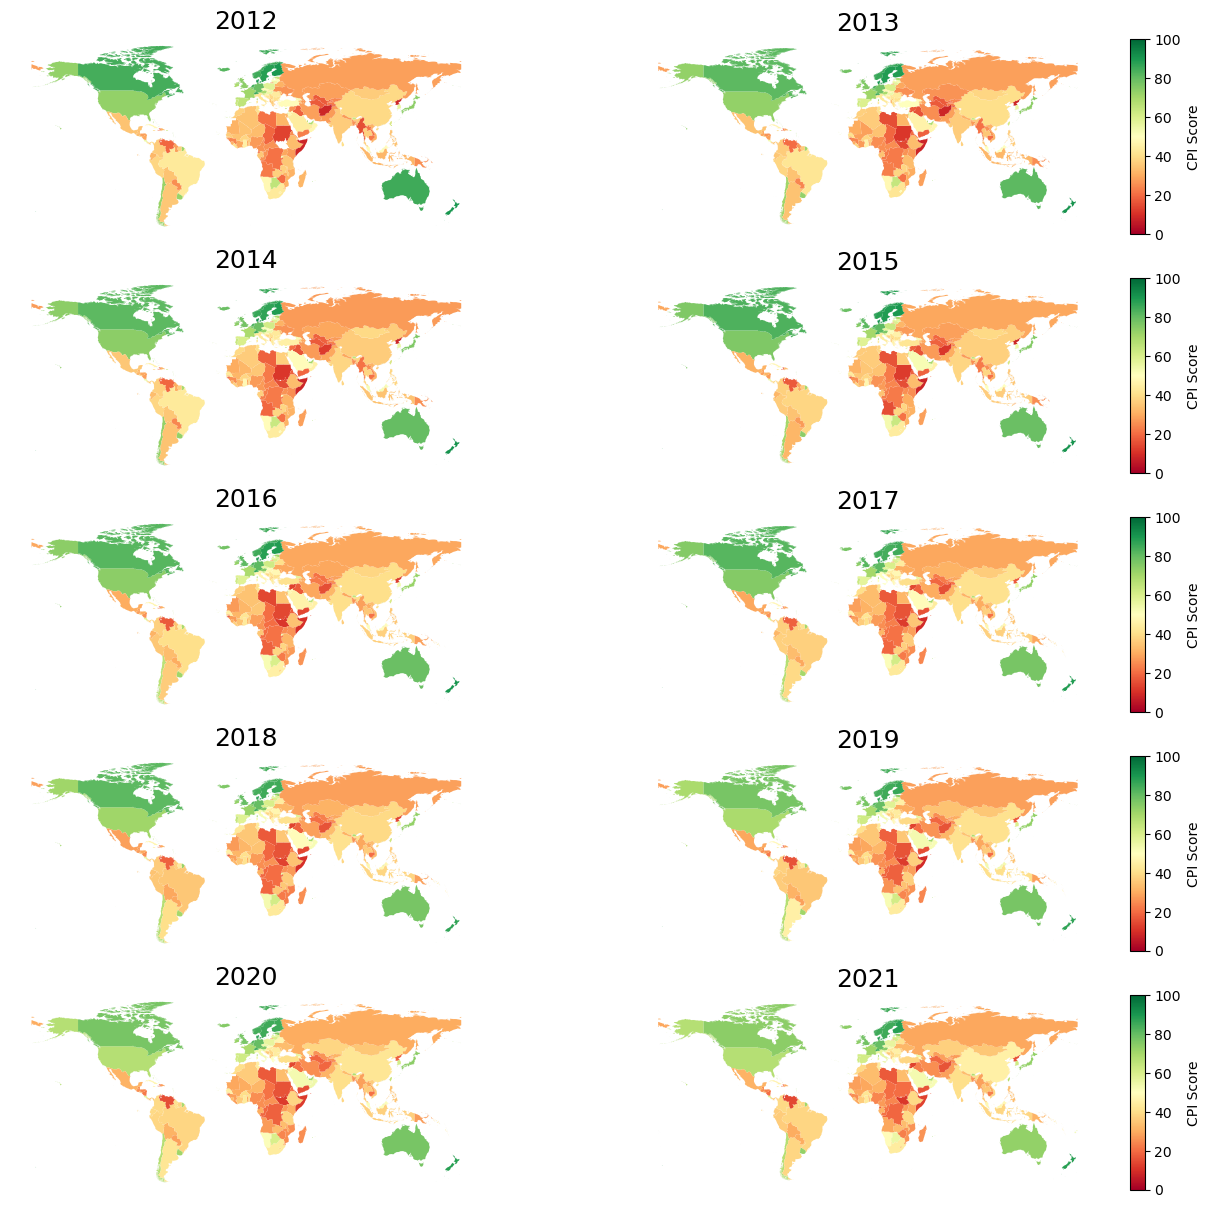

In [57]:
fig, map_axes = plt.subplots(5,2, figsize=(15,15))

from mpl_toolkits.axes_grid1 import make_axes_locatable

year = 2012

for ax_tuple in map_axes:
    for ax in ax_tuple: 
        if year % 2 != 0:
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="3%", pad=0.1)
            ax.set_axis_off()
            ax.set_title(year,fontsize=18)
            map_cpi.plot(column='CPI score {}'.format(year), 
                         ax=ax,  
                         legend=True, 
                         legend_kwds={'label': "CPI Score"}, 
                         cax=cax,
                         cmap='RdYlGn',
                         vmin=0,
                         vmax=100
                        );

        else:
            ax.set_axis_off()
            ax.set_title(year,fontsize=18)
            map_cpi.plot(column='CPI score {}'.format(year), 
                         ax=ax,
                         cmap='RdYlGn',
                         vmin=0,
                         vmax=100
                        );
        # plot Taiwan after the main map, so it can overlap China
        taiwan_map_cpi.plot(
                            column='CPI score {}'.format(year), 
                            ax=ax, 
                            cmap='RdYlGn',
                            vmin=0,
                            vmax=100
                            )
        year+=1
        

## Worldwide CPI Score From 2012 to 2021

![CPI Score From 2012 to 2021](pictures/cpi_changes_smooth.gif "CPI Score From 2012 to 2021")

In [58]:
cpi_cols = [col_name for col_name in col_names if 'CPI' in col_name]

score_means = CPI.describe()[cpi_cols].loc['mean',:]
score_means = score_means.rename(lambda x: int(x.replace("CPI score", "")))
score_means

2021    43.266667
2020    43.344444
2019    43.166667
2018    43.116667
2017    43.072222
2016    42.948864
2015    42.595238
2014    43.268571
2013    42.655367
2012    43.267045
Name: mean, dtype: float64

In [59]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

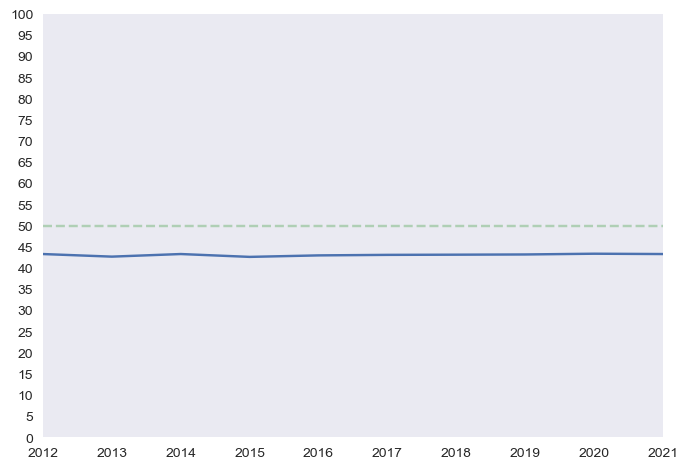

In [60]:
plt.style.use('seaborn-v0_8')
plt.plot(score_means)
plt.xlim(2012,2021)
plt.ylim(0,100)
plt.yticks(range(0,101,5))
# Transparency International's average worldwide CPI score goal
plt.axhline(50, color='green', alpha=0.25, linestyle='--')

plt.grid(False)

plt.show()

(2012.0, 2021.0)

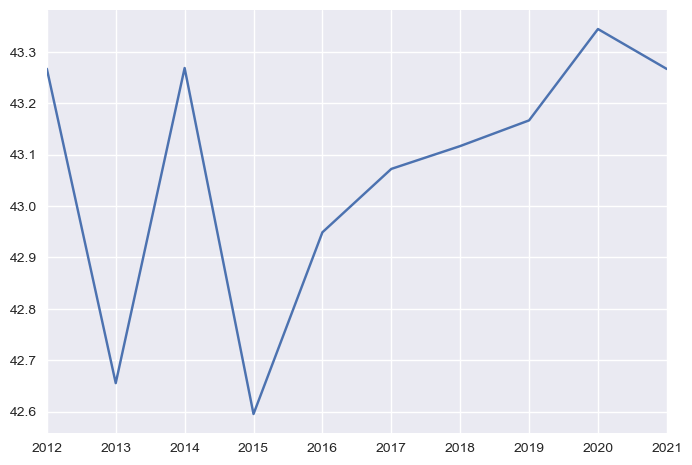

In [61]:
plt.plot(score_means)
plt.xlim(2012,2021)

In [62]:
# Calculate percentage of countries that's above 50
abv_50_pct = {}
abv_50_num = {}

year = 2021
for col in cpi_cols:
#     print(col)
    num_countries = CPI[col].notna().sum()
    num_countries_abv50 = (CPI[col] >= 50).sum()
    abv_50_pct[year] = num_countries_abv50 / num_countries * 100
    abv_50_num[year] = num_countries_abv50
    year -= 1
abv_50_pct
abv_50_num
#     print(CPI[col].notna().sum())
#     abv_50_pct[2012] = CPI[col].sum() / len()

{2021: 57,
 2020: 59,
 2019: 59,
 2018: 57,
 2017: 56,
 2016: 54,
 2015: 54,
 2014: 54,
 2013: 54,
 2012: 53}

(2012.0, 2021.0)

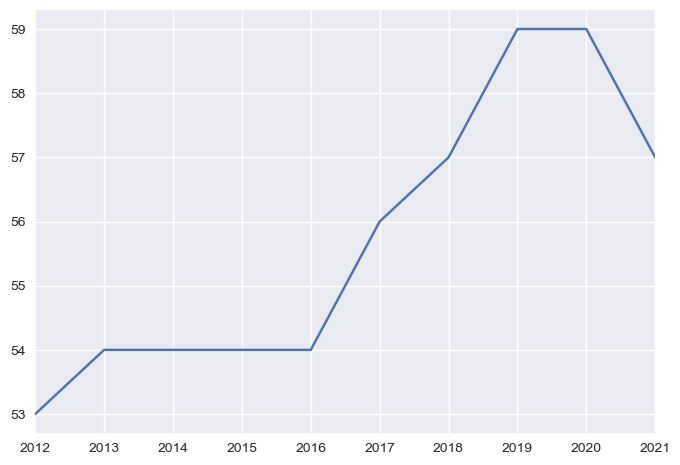

In [63]:
# Number of countries above 50
# ugly x and y
plt.plot(list(abv_50_num.keys()), list(abv_50_num.values()))
plt.yticks(range(53,60,1))
plt.xticks(range(2012,2022))
plt.xlim((2012,2021))

(2012.0, 2021.0)

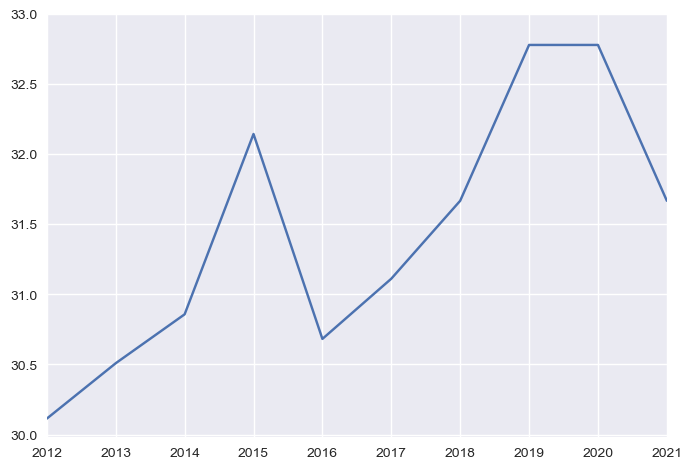

In [64]:
import numpy as np
# Let's look at the percentages with CPI score above 50 across the years
plt.plot(list(abv_50_pct.keys()), list(abv_50_pct.values()))
plt.yticks(np.arange(30,33.5,0.5))
plt.xticks(range(2012,2022))
plt.xlim((2012,2021))

In [65]:
# create below 50
# create a function for this
# Calculate percentage of countries that's below 50
bel_50_pct = {}
bel_50_num = {}

year = 2021
for col in cpi_cols:
#     print(col)
    num_countries = CPI[col].notna().sum()
    num_countries_bel50 = (CPI[col] < 50).sum()
    bel_50_pct[year] = num_countries_bel50 / num_countries * 100
    bel_50_num[year] = num_countries_bel50
    year -= 1
bel_50_pct
bel_50_num

{2021: 123,
 2020: 121,
 2019: 121,
 2018: 123,
 2017: 124,
 2016: 122,
 2015: 114,
 2014: 121,
 2013: 123,
 2012: 123}

(2012.0, 2021.0)

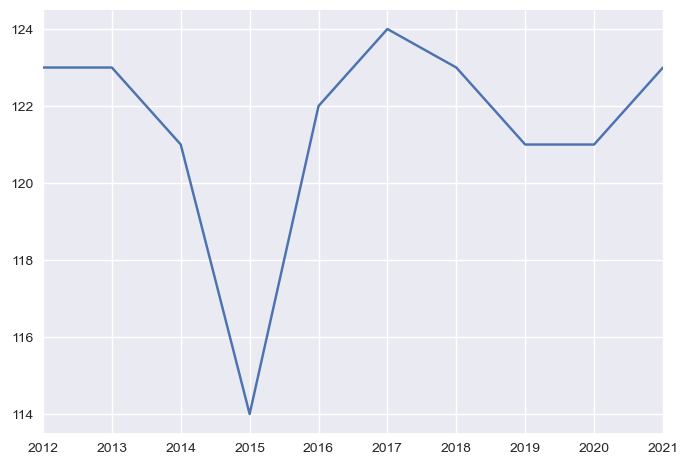

In [66]:
# Number of countries above 50
# ugly x and y
plt.plot(list(bel_50_num.keys()), list(bel_50_num.values()))
# plt.yticks(range(114,124,1))
plt.xticks(range(2012,2022))
plt.xlim((2012,2021))

(2012.0, 2021.0)

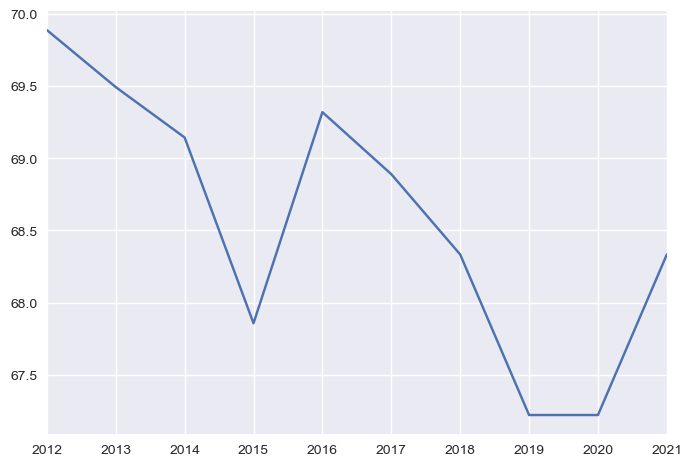

In [67]:
import numpy as np
# Let's look at the percentages with CPI score above 50 across the years
plt.plot(list(bel_50_pct.keys()), list(bel_50_pct.values()))
# plt.yticks(np.arange(30,33.5,0.5))
plt.xticks(range(2012,2022))
plt.xlim((2012,2021))

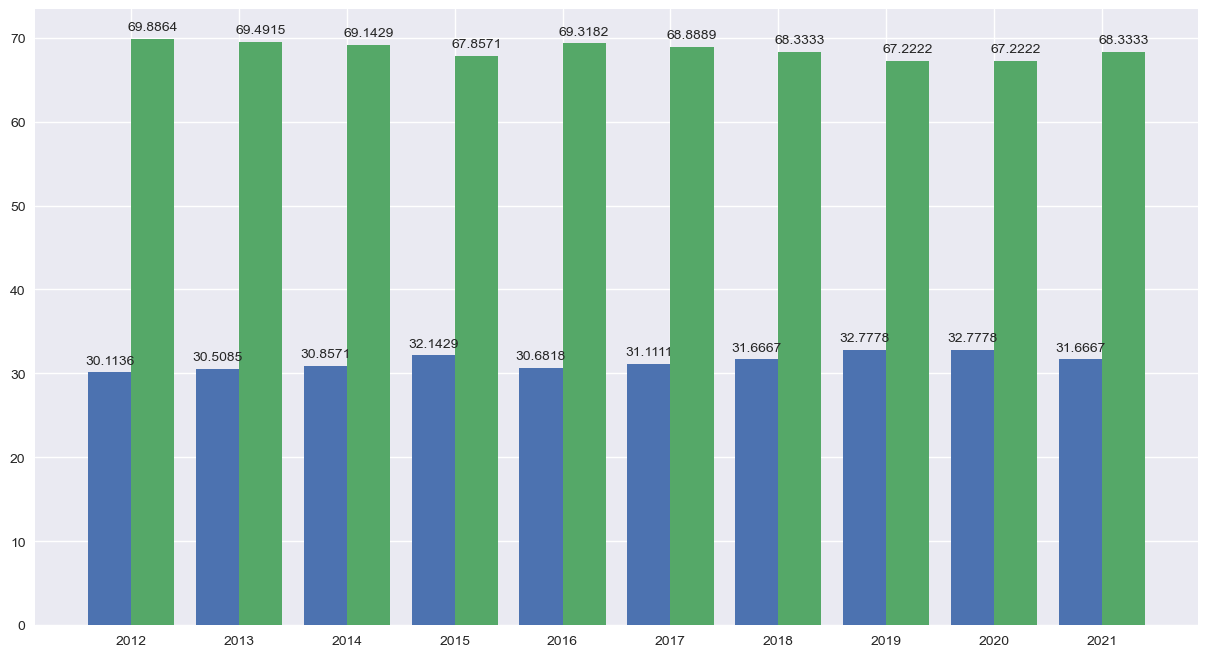

In [68]:
fig, ax = plt.subplots(figsize=(15,8))

x = np.arange(10)  # the label locations
width = 0.4  # the width of the bars

rev_abv_50_pct = list(reversed(list(abv_50_pct.values())))
rev_bel_50_pct = list(reversed(list(bel_50_pct.values())))

rects1 = ax.bar(x - width/2,  rev_abv_50_pct, width,  label='Men')
rects2 = ax.bar(x + width/2,  rev_bel_50_pct, width,  label='Women')

ax.bar_label(rects1, padding=4)
ax.bar_label(rects2, padding=4)
ax.set_xticks(x, list(range(2012,2022)))

plt.show()

### Region CPI score

In [69]:
cpi_region_means = CPI.groupby("Region").mean(numeric_only=True)[cpi_cols]

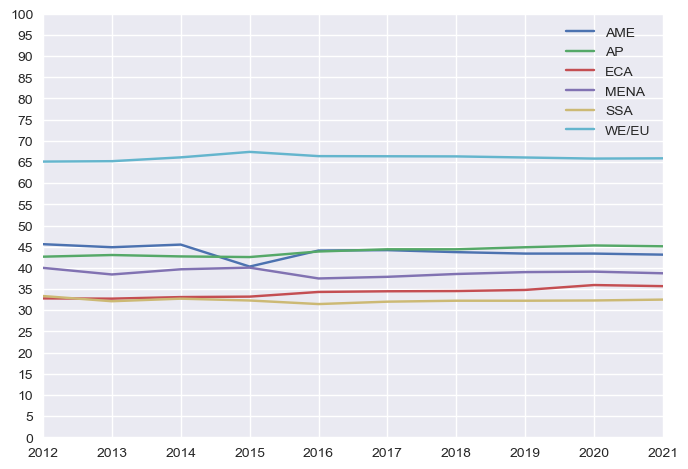

In [70]:
# AME   - The Americas
# AP    - Asia Pacific
# ECA   - Eastern Europe & Central Asia
# MENA  - Middle East & North Africa
# SSA   - Sub-Saharan Africa
# WE/EU - Western Europe

year_list = list(range(2012,2022))

for region in cpi_region_means.iterrows():
    reversed_cpi = list(reversed(region[1]))
    plt.plot(year_list, reversed_cpi, label=region[0])
    
plt.xlim(2012, 2021)
plt.ylim(0, 100)
plt.yticks(range(0,101,5))
plt.legend(loc='upper right')

In [71]:
# Compare with main CPI dataframe
# print(map_cpi.groupby("Region").mean(numeric_only=True))
# print(CPI.groupby("Region").mean(numeric_only=True))
print(map_cpi.groupby("Region").size())
print(CPI.groupby("Region").size())

# It seems that the Netherlands has multiple polygons and all of them are not duplicates
# map_cpi[map_cpi["Region"] == "WE/EU"].duplicated(subset="geometry")
# map_cpi[map_cpi["Region"] == "WE/EU"].duplicated()

map_cpi[map_cpi["ISO3"] == "CIV"]
CPI[CPI["ISO3"] == "CIV"]

Region
AME      33
AP       32
ECA      19
MENA     18
SSA      49
WE/EU    34
dtype: int64
Region
AME      33
AP       32
ECA      19
MENA     18
SSA      49
WE/EU    31
dtype: int64


,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
104,Cote d'Ivoire,CIV,SSA,36.0,105.0,36.0,104.0,35.0,106.0,35.0,105.0,36.0,103.0,34.0,108.0,106.0,32.0,115.0,32.0,136.0,27.0,130.0,29.0


In [72]:
map_cpi[map_cpi.duplicated(subset="ISO3") & ~map_cpi["ISO3"].isna()]

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
237,235.0,236.0,Admin-0 country,2.0,Country,Kingdom of the Netherlands,,17084719.0,14.0,870800.0,2017.0,2011.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Sint Eustatius (Neth.),Name in italic,Other,0.178178,0.001619,"POLYGON ((-62.99714 17.52562, -62.99470 17.492...",Netherlands,NLD,WE/EU,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,83.0,8.0,9.0,84.0,8.0,83.0,8.0,83.0,9.0,84.0
238,236.0,237.0,Admin-0 country,2.0,Country,Kingdom of the Netherlands,,17084719.0,14.0,870800.0,2017.0,2011.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Saba (Neth.),Name in italic,Other,0.090968,0.000601,"POLYGON ((-63.23843 17.64692, -63.24893 17.640...",Netherlands,NLD,WE/EU,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,83.0,8.0,9.0,84.0,8.0,83.0,8.0,83.0,9.0,84.0
239,237.0,238.0,Admin-0 country,2.0,Country,Kingdom of the Netherlands,,17084719.0,14.0,870800.0,2017.0,2011.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,NL,NLD,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Netherlands,None,Other,22.816386,4.884540,"MULTIPOLYGON (((3.73422 51.35578, 3.70216 51.3...",Netherlands,NLD,WE/EU,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,83.0,8.0,9.0,84.0,8.0,83.0,8.0,83.0,9.0,84.0
250,250.0,251.0,Admin-0 country,2.0,Country,New Zealand,,4510327.0,12.0,174800.0,2017.0,2006.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NZ,NZ,NZL,NZL,554,554,NZ,NZL,Oceania,Oceania,Australia and New Zealand,East Asia & Pacific,نيوزيلندا,নিউজিল্যান্ড,Neuseeland,New Zealand,Nueva Zelanda,Nouvelle-Zélande,Νέα Ζηλανδία,न्यूज़ीलैण्ड,Új-Zéland,Selandia Baru,Nuova Zelanda,ニュージーランド,뉴질랜드,Nieuw-Zeeland,Nowa Zelandia,Nova Zelândia,Новая Зеландия,Nya Zeeland,Yeni Zelanda,New Zealand,新西兰,New Zealand,None,Other,104.828986,29.143542,"MULTIPOLYGON (((169.21276 -52.47456, 169.20502...",New Zealand,NZL,AP,88.0,1.0,88.0,1.0,87.0,1.0,87.0,2.0,89.0,1.0,90.0,1.0,1.0,91.0,2.0,91.0,1.0,91.0,1.0,90.0


In [73]:
# map_cpi[map_cpi["N"] == "WE/EU"]
map_cpi["FORMAL_EN"].value_counts()

                              22
Kingdom of the Netherlands     4
New Zealand                    2
Arab Republic of Egypt         1
Burkina Faso                   1
                              ..
Republic of Sierra Leone       1
Republic of Guinea             1
Republic of Liberia            1
Central African Republic       1
Republic of El Salvador        1
Name: FORMAL_EN, Length: 226, dtype: int64

In [74]:
# The size of WE/EU in map_cpi is bigger than the size of WE/EU in map_cpi because the Netherlands has 3 extra geometries
map_cpi[map_cpi["NAME_EN"] == "Netherlands"]

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
236,234.0,235.0,Admin-0 country,2.0,Country,Kingdom of the Netherlands,,17084719.0,14.0,870800.0,2017.0,2011.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Bonaire (Neth.),Name in italic,Other,0.870961,0.022355,"POLYGON ((-68.21154 12.22809, -68.22053 12.231...",Netherlands,NLD,WE/EU,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,83.0,8.0,9.0,84.0,8.0,83.0,8.0,83.0,9.0,84.0
237,235.0,236.0,Admin-0 country,2.0,Country,Kingdom of the Netherlands,,17084719.0,14.0,870800.0,2017.0,2011.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Sint Eustatius (Neth.),Name in italic,Other,0.178178,0.001619,"POLYGON ((-62.99714 17.52562, -62.99470 17.492...",Netherlands,NLD,WE/EU,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,83.0,8.0,9.0,84.0,8.0,83.0,8.0,83.0,9.0,84.0
238,236.0,237.0,Admin-0 country,2.0,Country,Kingdom of the Netherlands,,17084719.0,14.0,870800.0,2017.0,2011.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Saba (Neth.),Name in italic,Other,0.090968,0.000601,"POLYGON ((-63.23843 17.64692, -63.24893 17.640...",Netherlands,NLD,WE/EU,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,83.0,8.0,9.0,84.0,8.0,83.0,8.0,83.0,9.0,84.0
239,237.0,238.0,Admin-0 country,2.0,Country,Kingdom of the Netherlands,,17084719.0,14.0,870800.0,2017.0,2011.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,NL,NLD,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Netherlands,None,Other,22.816386,4.884540,"MULTIPOLYGON (((3.73422 51.35578, 3.70216 51.3...",Netherlands,NLD,WE/EU,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,83.0,8.0,9.0,84.0,8.0,83.0,8.0,83.0,9.0,84.0


In [75]:
# New Zealand has two geometries yet the size of AP is still the same; it's because Taiwan is not in map_cpi thus balancing out the extra country
map_cpi[map_cpi["NAME_EN"] == "New Zealand"]

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
249,249.0,250.0,Admin-0 country,2.0,Country,New Zealand,,4510327.0,12.0,174800.0,2017.0,2006.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NZ,NZ,NZL,NZL,554,554,,TKL,Oceania,Oceania,Australia and New Zealand,East Asia & Pacific,نيوزيلندا,নিউজিল্যান্ড,Neuseeland,New Zealand,Nueva Zelanda,Nouvelle-Zélande,Νέα Ζηλανδία,न्यूज़ीलैण्ड,Új-Zéland,Selandia Baru,Nuova Zelanda,ニュージーランド,뉴질랜드,Nieuw-Zeeland,Nowa Zelandia,Nova Zelândia,Новая Зеландия,Nya Zeeland,Yeni Zelanda,New Zealand,新西兰,Tokelau (NZ),Name in italic,Other,0.178453,0.000348,"MULTIPOLYGON (((-171.18566 -9.36126, -171.1873...",New Zealand,NZL,AP,88.0,1.0,88.0,1.0,87.0,1.0,87.0,2.0,89.0,1.0,90.0,1.0,1.0,91.0,2.0,91.0,1.0,91.0,1.0,90.0
250,250.0,251.0,Admin-0 country,2.0,Country,New Zealand,,4510327.0,12.0,174800.0,2017.0,2006.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NZ,NZ,NZL,NZL,554,554,NZ,NZL,Oceania,Oceania,Australia and New Zealand,East Asia & Pacific,نيوزيلندا,নিউজিল্যান্ড,Neuseeland,New Zealand,Nueva Zelanda,Nouvelle-Zélande,Νέα Ζηλανδία,न्यूज़ीलैण्ड,Új-Zéland,Selandia Baru,Nuova Zelanda,ニュージーランド,뉴질랜드,Nieuw-Zeeland,Nowa Zelandia,Nova Zelândia,Новая Зеландия,Nya Zeeland,Yeni Zelanda,New Zealand,新西兰,New Zealand,None,Other,104.828986,29.143542,"MULTIPOLYGON (((169.21276 -52.47456, 169.20502...",New Zealand,NZL,AP,88.0,1.0,88.0,1.0,87.0,1.0,87.0,2.0,89.0,1.0,90.0,1.0,1.0,91.0,2.0,91.0,1.0,91.0,1.0,90.0


In [76]:
CPI[CPI["Region"] == "AP"]["Country"].value_counts().sort_index()

Afghanistan          1
Australia            1
Bangladesh           1
Bhutan               1
Brunei Darussalam    1
Cambodia             1
China                1
Fiji                 1
Hong Kong            1
India                1
Indonesia            1
Japan                1
Korea, North         1
Korea, South         1
Laos                 1
Malaysia             1
Maldives             1
Mongolia             1
Myanmar              1
Nepal                1
New Zealand          1
Pakistan             1
Papua New Guinea     1
Philippines          1
Singapore            1
Solomon Islands      1
Sri Lanka            1
Taiwan               1
Thailand             1
Timor-Leste          1
Vanuatu              1
Vietnam              1
Name: Country, dtype: int64

In [77]:
map_cpi[map_cpi["Region"] == "AP"]["Country"].value_counts().sort_index()
# map_cpi[map_cpi["Region"] == "AP"]

Afghanistan          1
Australia            1
Bangladesh           1
Bhutan               1
Brunei Darussalam    1
Cambodia             1
China                1
Fiji                 1
Hong Kong            1
India                1
Indonesia            1
Japan                1
Korea, North         1
Korea, South         1
Laos                 1
Malaysia             1
Maldives             1
Mongolia             1
Myanmar              1
Nepal                1
New Zealand          2
Pakistan             1
Papua New Guinea     1
Philippines          1
Singapore            1
Solomon Islands      1
Sri Lanka            1
Thailand             1
Timor-Leste          1
Vanuatu              1
Vietnam              1
Name: Country, dtype: int64

In [78]:
CPI[CPI["Region"] == "WE/EU"]["Country"].value_counts().sort_index()

Austria           1
Belgium           1
Bulgaria          1
Croatia           1
Cyprus            1
Czechia           1
Denmark           1
Estonia           1
Finland           1
France            1
Germany           1
Greece            1
Hungary           1
Iceland           1
Ireland           1
Italy             1
Latvia            1
Lithuania         1
Luxembourg        1
Malta             1
Netherlands       1
Norway            1
Poland            1
Portugal          1
Romania           1
Slovakia          1
Slovenia          1
Spain             1
Sweden            1
Switzerland       1
United Kingdom    1
Name: Country, dtype: int64

In [79]:
map_cpi[map_cpi["Region"] == "WE/EU"]["Country"].value_counts().sort_index()

Austria           1
Belgium           1
Bulgaria          1
Croatia           1
Cyprus            1
Czechia           1
Denmark           1
Estonia           1
Finland           1
Germany           1
Greece            1
Hungary           1
Iceland           1
Ireland           1
Italy             1
Latvia            1
Lithuania         1
Luxembourg        1
Malta             1
Netherlands       4
Poland            1
Portugal          1
Romania           1
Slovakia          1
Slovenia          1
Spain             1
Sweden            1
Switzerland       1
United Kingdom    1
Name: Country, dtype: int64

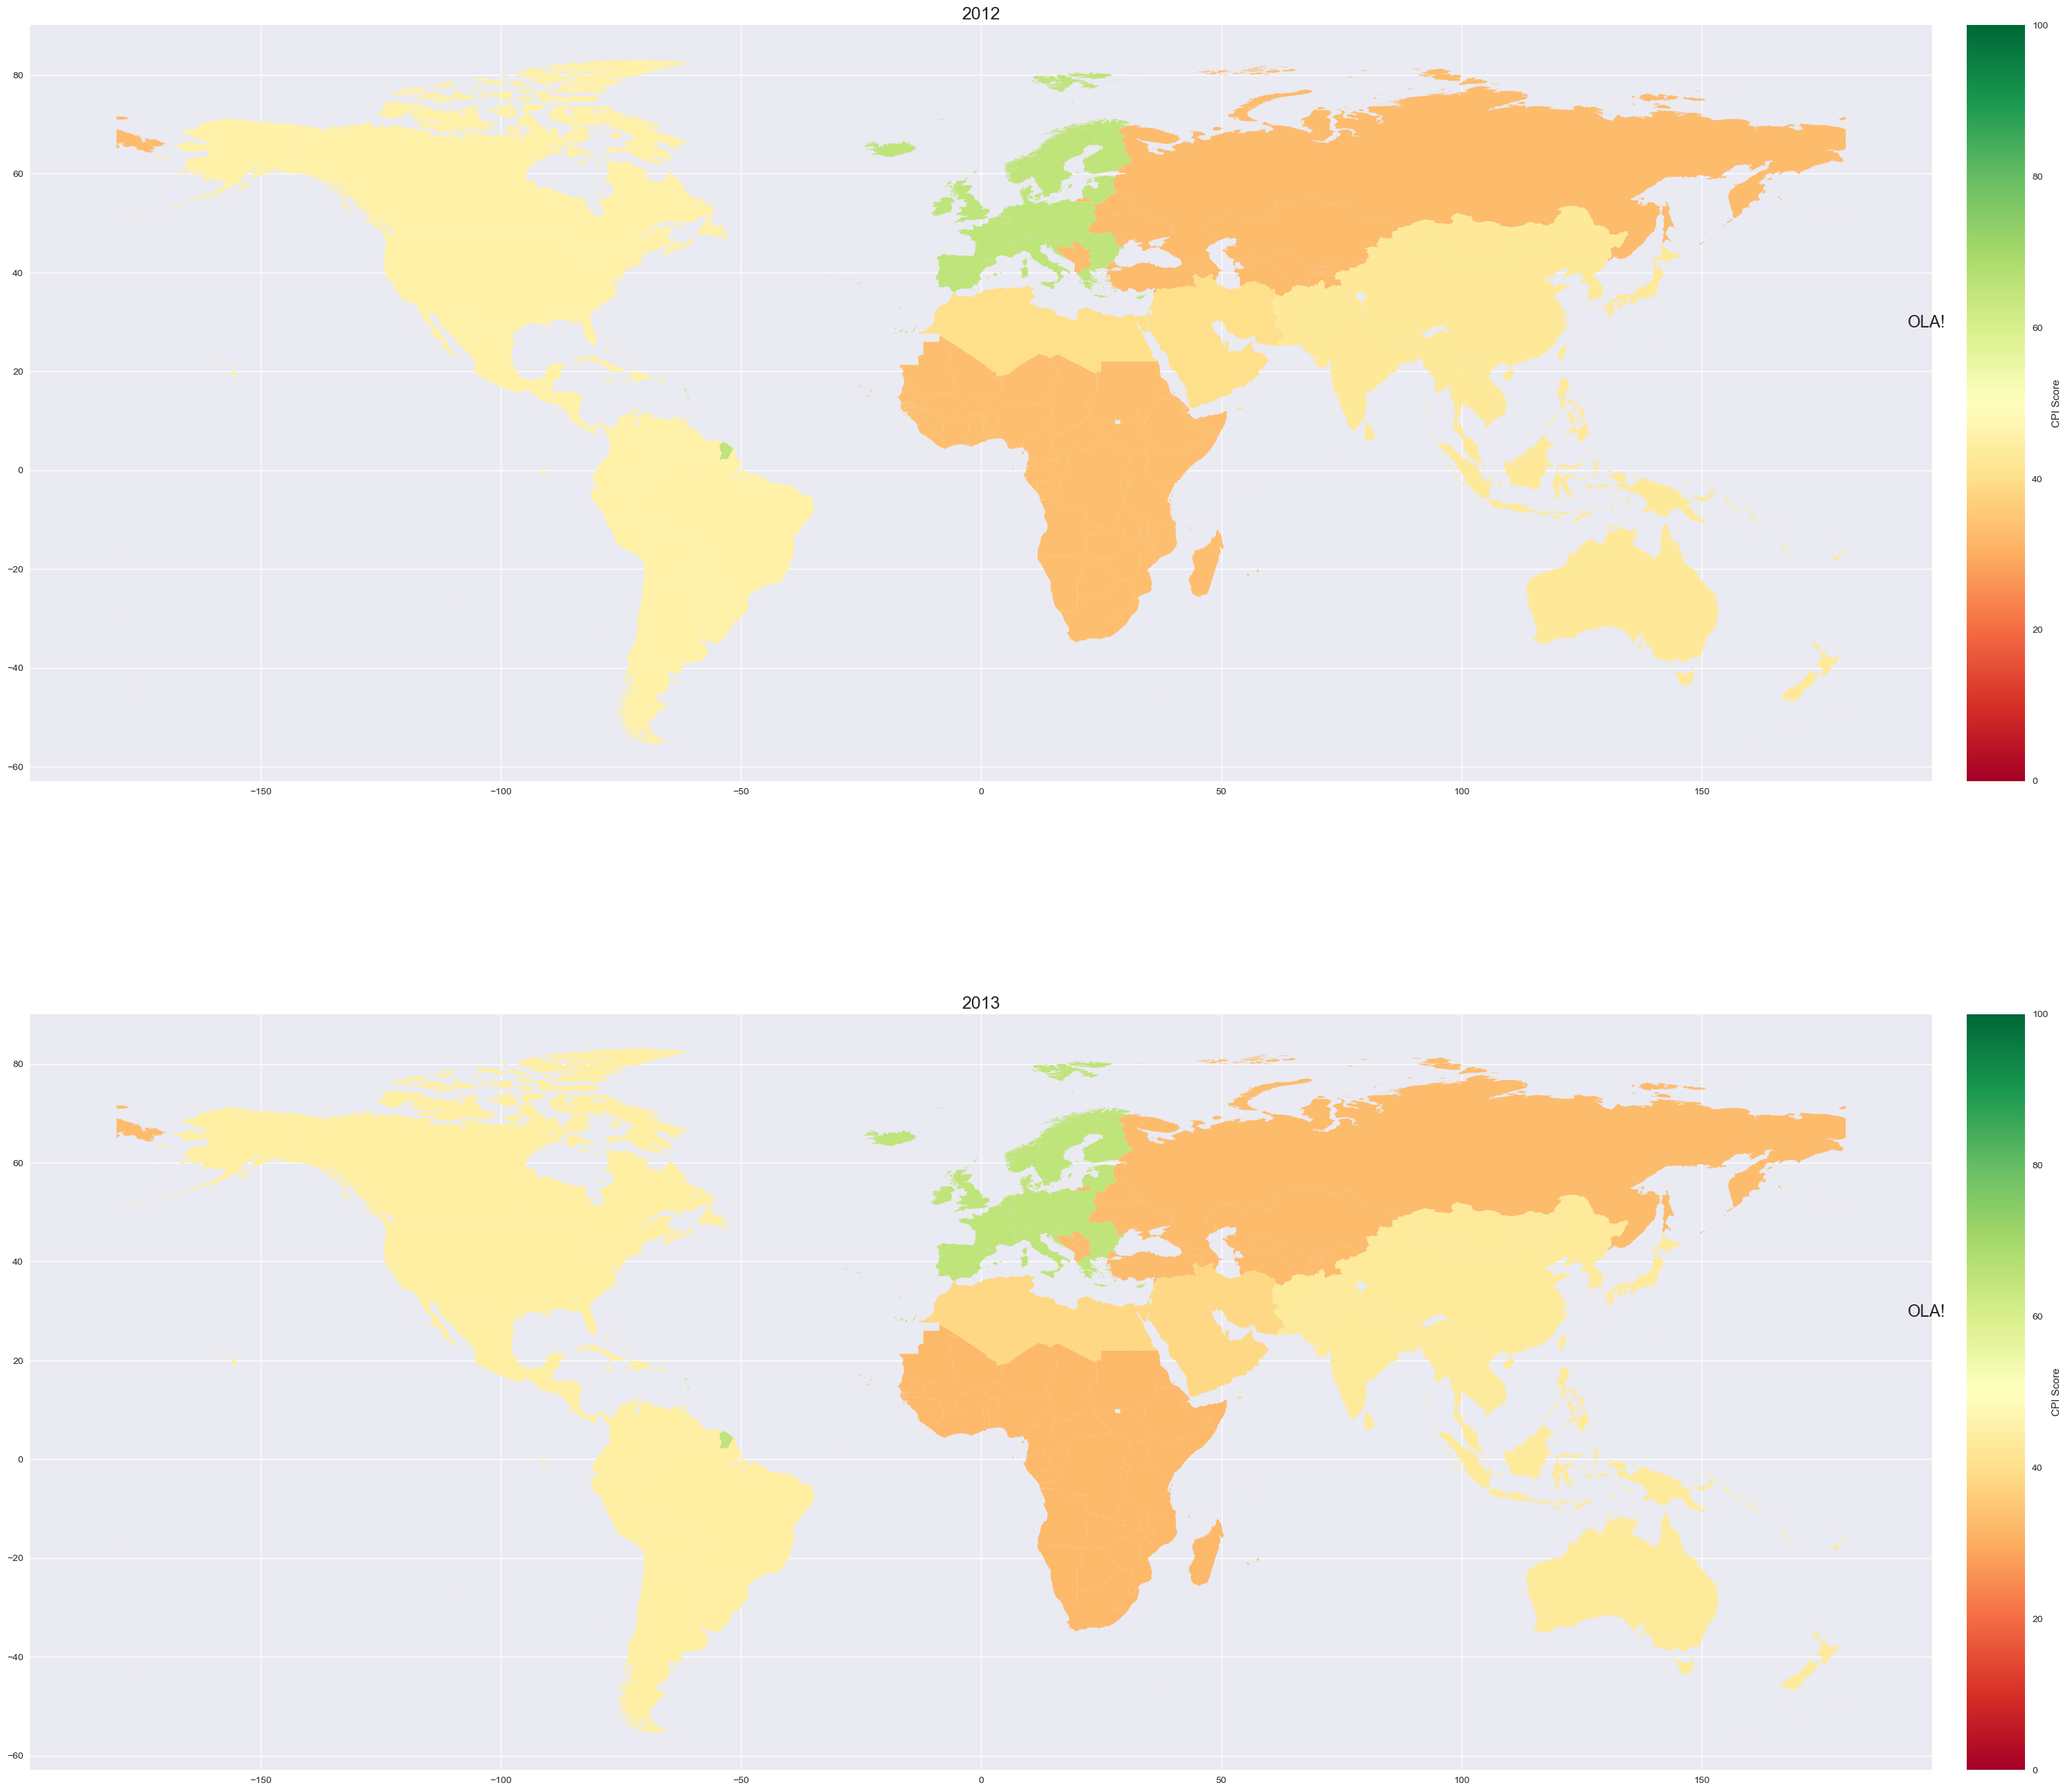

In [129]:
# map_cpi["Region"].dropna().unique()
# map_cpi[map_cpi["Region"] == "AP"].plot()


map_cpi_filled_region = map_cpi.dropna(subset="Region")

def get_region_mean(row, region_means):
    row_region = row["Region"]
    for year in range(2012,2022):
        region_mean = region_means.loc[row_region]["CPI score {}".format(year)]
        col_name = "region_mean_{}".format(year)
        row[col_name] = region_mean
    return row

test=map_cpi_filled_region.copy()

test_2 = map_cpi_filled_region.apply(lambda row: get_region_mean(row, cpi_region_means), axis=1)
# test_2.iloc[:,-10:-1]

# ap_region = test_2[test_2["Region"] == "AP"]

# fig, ax = plt.subplots(1,1)

# from matplotlib import cm, colors
# norm = colors.Normalize(vmin=0, vmax=100)

# cmap = cm.get_cmap('RdYlGn')
# color = cmap(norm(ap_region.iloc[0]["region_mean_2012"]))
# print(norm(ap_region.iloc[0]["region_mean_2012"]))
# print(color)
# # ax.set_axis_off()
# ap_region.plot( 
# #                 column='region_mean_2012', 
#                 ax=ax,
#                 legend=True, 
#                 legend_kwds={'label': "CPI Score"},
#                 color = color,
# #                 cmap='RdYlGn',
# #                 vmin=0,
# #                 vmax=100
# )

# ax.set_title(year,fontsize=18)
# plt.xlim(50, 200)
# plt.show()

# test_2.plot( column='region_mean_2012', 
#                 ax=ax,
#                 legend=True, 
#                 legend_kwds={'label': "CPI Score"},
# #                 color = color,
#                 cmap='RdYlGn',
#                 vmin=0,
#                 vmax=100
#            )
# for region, cpi_scores in cpi_region_means.iterrows():
#     fig, map_axes = plt.subplots(1,10)
#     for ax in map_axes:
        
# cpi_region_means
# 10 default
fig, map_axes = plt.subplots(2,1, figsize=(30,30))

# from mpl_toolkits.axes_grid1 import make_axes_locatable

year = 2012

for ax in map_axes:
#         if year % 2 != 0:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="3%", pad=0.1)
#         ax.set_axis_off()
        ax.set_title(year,fontsize=18)
        test_2.plot(column='region_mean_{}'.format(year), 
                     ax=ax,  
                     legend=True, 
                     legend_kwds={'label': "CPI Score"}, 
                     cax=cax,
                     cmap='RdYlGn',
                     vmin=0,
                     vmax=100
                    );
        plt.text(-1,60,"OLA!", fontsize='xx-large')
        year+=1
plt.tight_layout()
#         else:
#             ax.set_axis_off()
#             ax.set_title(year,fontsize=18)
#             map_cpi.plot(column='CPI score {}'.format(year), 
#                          ax=ax,
#                          cmap='RdYlGn',
#                          vmin=0,
#                          vmax=100
#                         );
#         # plot Taiwan after the main map, so it can overlap China
#         taiwan_map_cpi.plot(
#                             column='CPI score {}'.format(year), 
#                             ax=ax, 
#                             cmap='RdYlGn',
#                             vmin=0,
#                             vmax=100
#                             )
        
        

### Compare 2012 to 2021 CPI score - which country changed and which didn't

In [81]:
# For those countries with CPI score in 2012 and 2021, how many of those countries have a different CPI score in 2021 than in 2012
CPI["changes_CPI_12to21"] = CPI["CPI score 2021"] - CPI["CPI score 2012"]

In [82]:
CPI[CPI["changes_CPI_12to21"] >= 1][["Country", "CPI score 2021", "CPI score 2012"]]

,Country,CPI score 2021,CPI score 2012
8,Luxembourg,81.0,80.0
9,Germany,80.0,79.0
10,United Kingdom,78.0,74.0
14,Ireland,74.0,69.0
15,Estonia,74.0,64.0
...,...,...,...
167,Sudan,20.0,13.0
170,Turkmenistan,19.0,17.0
173,Afghanistan,16.0,8.0
174,"Korea, North",16.0,8.0


In [83]:
# plot countries with at least one point improvement
cpi_change_threshold = 5
cpi_improvements = CPI[CPI["changes_CPI_12to21"] >= cpi_change_threshold][["Country", "CPI score 2021", "CPI score 2012", "changes_CPI_12to21"]]
cpi_declined     = CPI[CPI["changes_CPI_12to21"] <= -cpi_change_threshold][["Country", "CPI score 2021", "CPI score 2012", "changes_CPI_12to21"]]
cpi_stagnated         = CPI[CPI["changes_CPI_12to21"].between(-cpi_change_threshold,cpi_change_threshold)][["Country", "CPI score 2021", "CPI score 2012", "changes_CPI_12to21"]]
cpi_improvements

,Country,CPI score 2021,CPI score 2012,changes_CPI_12to21
14,Ireland,74.0,69.0,5.0
15,Estonia,74.0,64.0,10.0
16,Austria,74.0,69.0,5.0
22,Seychelles,70.0,52.0,18.0
24,Bhutan,68.0,63.0,5.0
25,Taiwan,68.0,61.0,7.0
31,"Korea, South",62.0,56.0,6.0
33,Lithuania,61.0,54.0,7.0
36,Latvia,59.0,49.0,10.0
41,Italy,56.0,42.0,14.0


In [84]:
cpi_declined

,Country,CPI score 2021,CPI score 2012,changes_CPI_12to21
12,Canada,74.0,84.0,-10.0
13,Iceland,74.0,82.0,-8.0
17,Australia,73.0,85.0,-12.0
26,Chile,67.0,72.0,-5.0
27,United States of America,67.0,73.0,-6.0
28,Barbados,65.0,76.0,-11.0
29,Bahamas,64.0,71.0,-7.0
30,Qatar,63.0,68.0,-5.0
43,Saint Lucia,56.0,71.0,-15.0
44,Botswana,55.0,65.0,-10.0


In [85]:
cpi_stagnated

,Country,CPI score 2021,CPI score 2012,changes_CPI_12to21
0,Denmark,88.0,90.0,-2.0
1,Finland,88.0,90.0,-2.0
2,New Zealand,88.0,90.0,-2.0
3,Norway,85.0,85.0,0.0
4,Singapore,85.0,87.0,-2.0
...,...,...,...,...
170,Turkmenistan,19.0,17.0,2.0
171,Equatorial Guinea,17.0,20.0,-3.0
172,Libya,17.0,21.0,-4.0
176,Venezuela,14.0,19.0,-5.0


<BarContainer object of 3 artists>

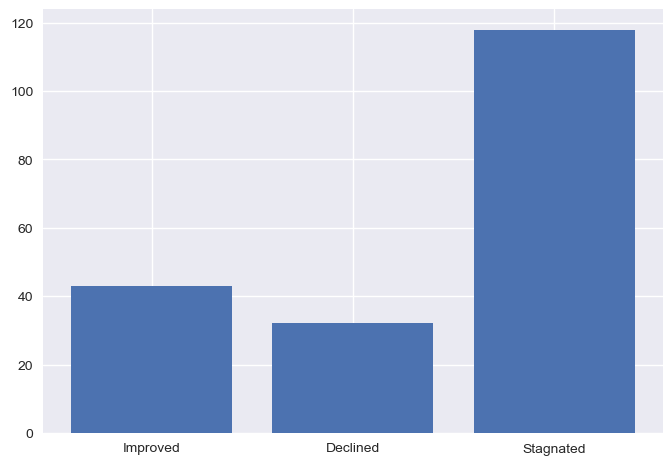

In [86]:
# plot improved, declined, and 0
sum_improved  = cpi_improvements.shape[0]
sum_declined  = cpi_declined.shape[0]
sum_stagnated = cpi_stagnated.shape[0]


plt.bar(["Improved", "Declined", "Stagnated"],[sum_improved, sum_declined, sum_stagnated])

In [87]:
# top 10 countries improved
cpi_improvements.sort_values("changes_CPI_12to21", ascending=False)[:10]

,Country,CPI score 2021,CPI score 2012,changes_CPI_12to21
22,Seychelles,70.0,52.0,18.0
57,Armenia,49.0,34.0,15.0
41,Italy,56.0,42.0,14.0
140,Myanmar,28.0,15.0,13.0
58,Greece,49.0,36.0,13.0
89,Guyana,39.0,28.0,11.0
142,Uzbekistan,28.0,17.0,11.0
82,Belarus,41.0,31.0,10.0
36,Latvia,59.0,49.0,10.0
15,Estonia,74.0,64.0,10.0


In [88]:
# top 10 countries declined
cpi_declined.sort_values("changes_CPI_12to21")[:10]

,Country,CPI score 2021,CPI score 2012,changes_CPI_12to21
43,Saint Lucia,56.0,71.0,-15.0
178,Syria,13.0,26.0,-13.0
52,Cyprus,53.0,66.0,-13.0
136,Liberia,29.0,41.0,-12.0
17,Australia,73.0,85.0,-12.0
73,Hungary,43.0,55.0,-12.0
100,Turkey,38.0,49.0,-11.0
28,Barbados,65.0,76.0,-11.0
12,Canada,74.0,84.0,-10.0
44,Botswana,55.0,65.0,-10.0


### Region

In [89]:
region_cpi = CPI.groupby("Region").mean(numeric_only=True)[cpi_cols]
region_cpi = region_cpi.rename(lambda x: int(x.replace("CPI score", "")), axis=1)

AME
AP
ECA
MENA
SSA
WE/EU


Index(['AME', 'AP', 'ECA', 'MENA', 'SSA', 'WE/EU'], dtype='object', name='Region')

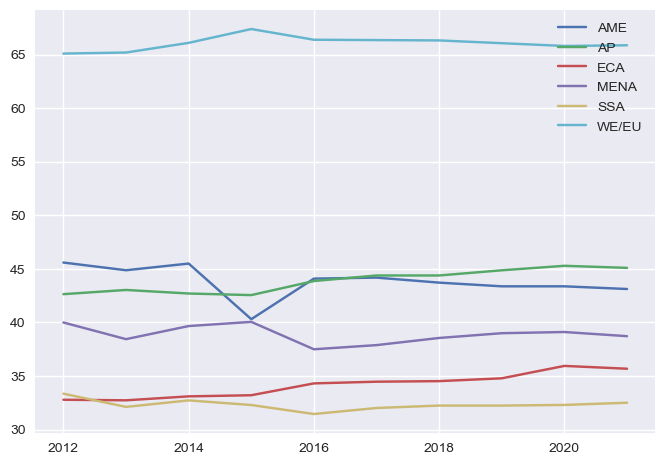

In [90]:
# plt.plot(region_cpi)
# plt.plot(region_cpi["AME"])
# plt.plot(region_cpi.loc["AME"].sort_index())
for region in region_cpi.index:
    print(region)
    plt.plot(region_cpi.loc[region], label=region)
    #     print(region)
#     print(data)
#     plt.plot(region)
# plt.plot(.loc["AME"])
# year
plt.legend()

region_cpi.index